In [7]:
import pandas as pd
import numpy as np
import requests as rq
import matplotlib.pyplot as plt

In [2]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'
res=rq.get(url)
with open('FuelConsumptionCo2.csv','wb') as f:
    f.write(res.content)

In [3]:
df=pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


array([[<AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'ENGINESIZE'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>]],
      dtype=object)

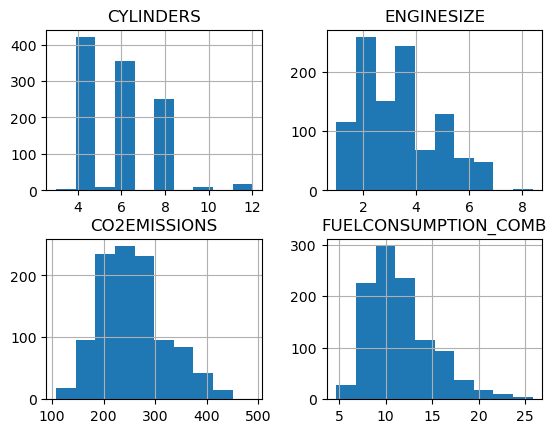

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()

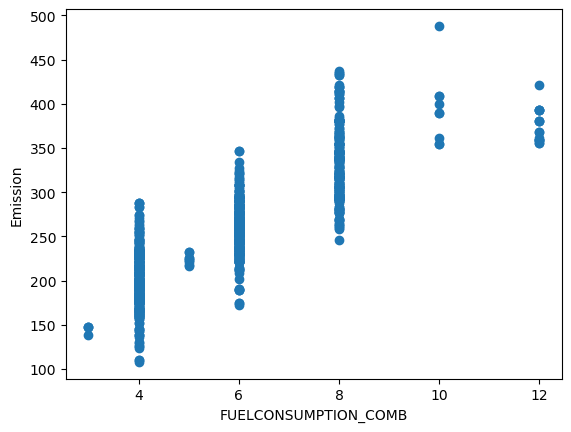

In [9]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

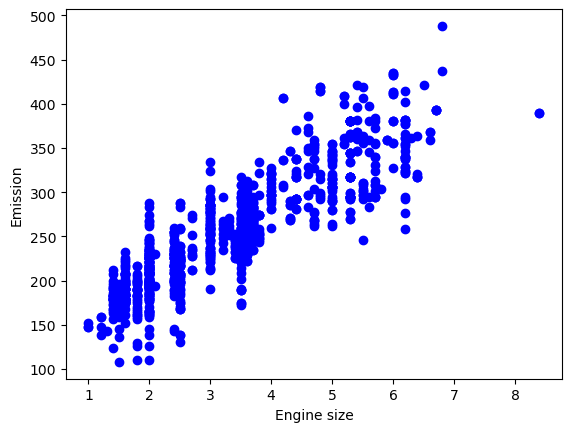

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [11]:
print(len(df))

1067


In [13]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

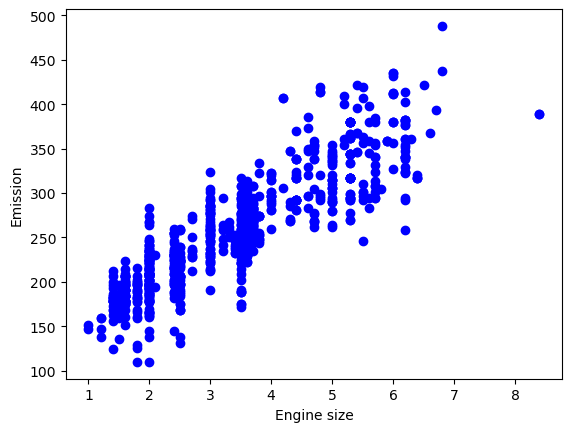

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
lr.fit(train_x,train_y)
print(lr.coef_)
print(lr.intercept_)

[[39.42548182]]
[124.03594469]


Text(0, 0.5, 'Emission')

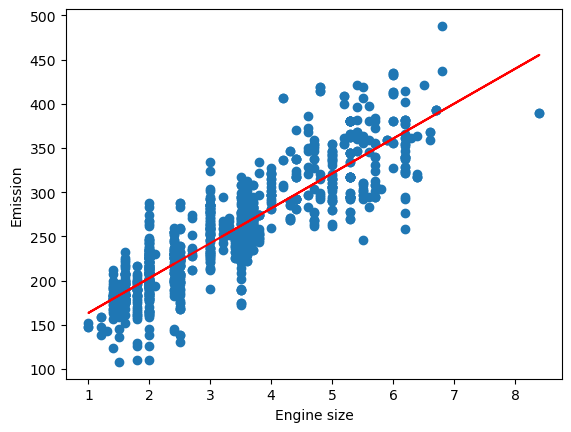

In [25]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
plt.plot(train_x,train_x*lr.coef_[0][0]+lr.intercept_[0],'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [30]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
yhat=lr.predict(test_x)

print(np.mean(np.absolute(yhat-test_y)))
print(np.mean((yhat-test_y)**2))
print(r2_score(test_y,yhat))

23.96321580649976
971.0600049946422
0.7527284731688533


In [42]:
x=train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y=train['CO2EMISSIONS']
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[11.38289271  7.37768723  9.63973667]
63.92572860322079


In [46]:
yhat=lr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
print(np.mean((yhat-test['CO2EMISSIONS'])**2))
print(lr.score(x,y))
print(r2_score(test['CO2EMISSIONS'],yhat))

561.7662916408632
0.8654705619313223
0.8569513645481939
